# **HR Analytics: Job Change of Data Scientists**


---



## Machine Learning and Data Mining project


---



### Sara Raccagni
### 2022/2023

# AUTO-SKLEARN


Auto-Sklearn is an **automated machine learning** toolkit and a drop-in replacement for a scikit-learn estimator. It frees a machine learning user from data preprocessing, hyperparameter optimization, model selection and evaluation. Thus, it automatically discovers well performing models for predictive tasks with a very little user involvement.


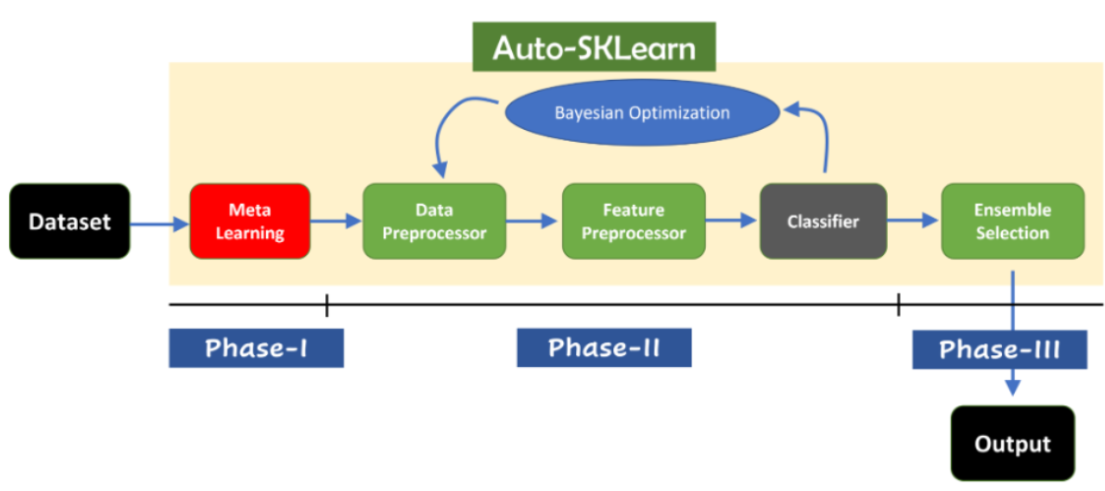

The user supplies the pipeline with raw data which has to be previously divided into training and testing sets. The **Meta Learning** phase is then executed, which is one of the greatest advancements of this framework: it computes the similarity between the dataset provided and others already known (from OpenML), and if there is a match, a list of techniques that performed well on such dataset is passed to be investigated through the pipeline. The **optimization cycle** is the second phase: a data preprocessor, a feature preprocessor and a classifier are randomly selected, and then the bayesian optimizer is used to optimize their hyperparameters until a threshold is reached (set by per_run_time_limit parameter). This cycle is repeated for each available classifier until another threshold is reached (set by time_left_for_this_task parameter). During the third phase, an **ensemble** of all the sub-pipeline combinations, ranked from the most accurate to the least accurate, is built. Ensemble models combine weighted outputs of multiple trained models to provide a final prediction.


In [ ]:
import sys
!pip install pandas-profiling==2.11.0
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==0.24.0
!pip3 install auto-sklearn
!pip install pipelineprofiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.7/243.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.2.0
    Uninstalling pandas-profiling-3.2.0:
      Successfully uninstalled pandas-profiling-3.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/1

In [ ]:
import autosklearn
import sklearn.model_selection
import sklearn.metrics
import PipelineProfiler

In [ ]:
import autosklearn.classification

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download arashnic/hr-analytics-job-change-of-data-scientists
! unzip hr-analytics-job-change-of-data-scientists.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/295k [00:00<?, ?B/s]
100% 295k/295k [00:00<00:00, 83.1MB/s]
Archive:  hr-analytics-job-change-of-data-scientists.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd
train = pd.read_csv("aug_train.csv")

In [ ]:
from sklearn.model_selection import train_test_split

y = train["target"]
X = train.drop("target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60*10)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

/usr/local/lib/python3.9/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column city has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column gender has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column relevent_experience has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column enrolled_university has generic type object. Autosklearn will treat this column as string. Plea

[WARNING] [2023-04-07 17:06:15,649:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-07 17:06:20,327:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-07 17:06:26,301:Client-EnsembleBuilder] No runs were available to build an ensemble from
Accuracy score 0.7816283924843423


In [ ]:
data = PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(data)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 53faad09-d566-11ed-8093-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.797765
  Number of target algorithm runs: 19
  Number of successful target algorithm runs: 9
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 3



In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
5            1             0.54  gradient_boosting  0.202235  15.747510
8            2             0.12  gradient_boosting  0.212779  14.848150
10           3             0.12      liblinear_svc  0.223534  12.307245
14           4             0.18                lda  0.231548  10.356776
9            5             0.04         libsvm_svc  0.246310  31.105359


In [ ]:
automl.show_models()

{5: {'model_id': 5,
  'rank': 1,
  'cost': 0.20223534373681995,
  'ensemble_weight': 0.54,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f8919e15e80>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f8919d34c40>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f8919d340a0>,
  'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=True,
                                 l2_regularization=1.7108930238344161e-10,
                                 learning_rate=0.010827728124541558, max_iter=512,
                                 max_leaf_nodes=25, min_samples_leaf=4,
                                 n_iter_no_change=19, random_state=1,
                                 validation_fraction=0.1759114608225653,
                                 warm_start=True)},
 8: {'model_id': 8,
